In [31]:
! pip install --upgrade wandb
! wandb login 01b5a57c6f2abde1180cf4786db51fbe3807823d

Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.13)
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [32]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="IMDB")

W&B Run: https://app.wandb.ai/foreist/IMDB/runs/uzlvxewf

In [0]:
from keras.datasets import imdb

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# 훈련 데이터에서 가장 많이 나타나는 1만 단어만 사용하겠다.

In [35]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2 인덱스는 패딩, 문서시작, 사전에 없음 인덱스이므로 3을 빼줌
# 설명이 빈약함
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [36]:
reverse_word_index.get(1, '?')

'the'

In [37]:
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [38]:
len(train_data)

25000

In [39]:
[print(i, j) for i, j in enumerate(train_data[:10])]

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 501

[None, None, None, None, None, None, None, None, None, None]

In [0]:
import numpy as np
def vectorsize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorsize_sequences(train_data)
x_test = vectorsize_sequences(test_data)

In [41]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[WandbCallback()])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
 3072/15000 [=====>........................] - ETA: 3s - loss: 0.6395 - acc: 0.6608

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.498448). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.250226). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


15000/15000 [==============================] - 3s 175us/step - loss: 0.4831 - acc: 0.8043 - val_loss: 0.3672 - val_acc: 0.8781
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2922 - acc: 0.9063 - val_loss: 0.3046 - val_acc: 0.8847
Epoch 3/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.2187 - acc: 0.9300 - val_loss: 0.3048 - val_acc: 0.8783
Epoch 4/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1752 - acc: 0.9436 - val_loss: 0.2800 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1395 - acc: 0.9558 - val_loss: 0.3425 - val_acc: 0.8660
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1175 - acc: 0.9643 - val_loss: 0.2993 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0952 - acc: 0.9723 - val_loss: 0.3166 - val_acc: 0.8808
Epoch 8/20
15000/15000 [=====================

In [47]:
# model.fit()s는 history를 반환함
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

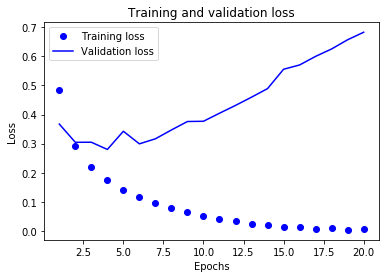

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

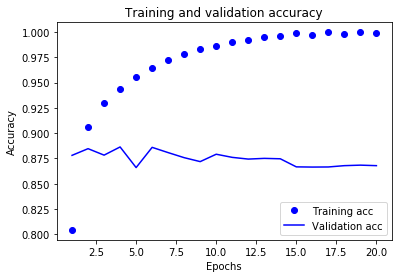

In [50]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
history_dict.get('acc')

[0.8043333331425985,
 0.9062666666348775,
 0.9300000002861023,
 0.943599999777476,
 0.955800000222524,
 0.9642666663805644,
 0.9722666668256124,
 0.9781999999046326,
 0.9832666664759317,
 0.9864666665712992,
 0.9902000002543132,
 0.992333333492279,
 0.9951333333333333,
 0.9961333333333333,
 0.9990666666666667,
 0.9971333333333333,
 0.9998,
 0.9982666666666666,
 0.9998666666666667,
 0.9992666666666666]

In [0]:
# 네 번째 epoch에서 그래프가 역전되는 것 같음(오버피팅)

In [53]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.4734 - acc: 0.8205
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2705 - acc: 0.9052
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2065 - acc: 0.9257
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


In [54]:
results

[0.2929059097099304, 0.88424]

In [55]:
model.predict(x_test)

array([[0.2669717 ],
       [0.99964476],
       [0.8710559 ],
       ...,
       [0.16822392],
       [0.11779603],
       [0.67962503]], dtype=float32)

In [56]:
y_test.size

25000

In [57]:
# 은닉층을 하나 사용해보기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
#model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results
# 전과 별 차이가 없다.

Epoch 1/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.4432 - acc: 0.8311
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2753 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2180 - acc: 0.9254
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step


[0.28466641231536866, 0.88556]

In [58]:
# 은닉층을 3개 사용해보기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results # 별 차이 없네

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4657 - acc: 0.8174
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2595 - acc: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.1986 - acc: 0.9264
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


[0.2988800181388855, 0.88312]

In [60]:
# 은닉 유닛 32개
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results # 별 차이 없네

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4294 - acc: 0.8162
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2455 - acc: 0.9109
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.1866 - acc: 0.9321
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


[0.31454385123729706, 0.879]

In [61]:
# 은닉 유닛 64개
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results # 오히려 더 안 좋아짐

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4268 - acc: 0.8157
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2379 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1868 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


[0.34747829103946687, 0.86936]

In [62]:
# 은닉 유닛 64개
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results # mse도 뭐 큰 차이 없는듯

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1344 - acc: 0.8156
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0687 - acc: 0.9138
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.0547 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step


[0.10661985008507967, 0.85816]

In [63]:
# 은닉 유닛 64개
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results # mse도 뭐 큰 차이 없는듯

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4014 - acc: 0.8235
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2224 - acc: 0.9142
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1833 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 3s 101us/step


[0.3442691012096405, 0.87444]